In [1]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

**Generating Sample Data:**
- Since I don't have data to test with, just gonna generate some random data:

In [2]:
# generate 2 clusters: a with 100 points, b with 50
np.random.seed(4711) # for repeatability
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
print(X.shape)

(150, 2)


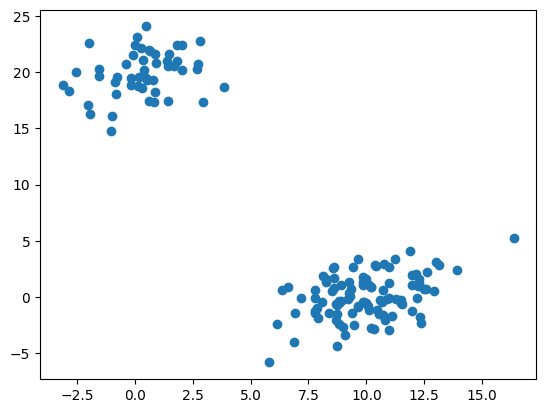

In [3]:
plt.scatter(X[:,0],X[:,1])
plt.show()

**Perform the hierarchical clustering:**

- linkage: scipy.cluster.hierarchy.linkage => performs hierarchical/agglomerative clustering. The input may either be a 1D condensed distance matrix, or a 2D array of observation vectors. 

In [4]:
Z = linkage(X, 'ward')

Look up and understand different distance and linkage methods and use the ones that best fit/work for the chosen dataset.
Another thing we can do is check the Cophenetic Correlation Coefficient of the clustering with the help of the cophenet() function. This fxn compares(correlates) the actual pairwise distances of all the samples to those implied by the hierarchical clustering. the closer the value is to 1, the better the clustering preserves the original distances, which is close in our case.

In [5]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [6]:
c, coph_dists = cophenet(Z, pdist(X))

In [7]:
c

0.9800148387574268

No matter the method(linkage method), and metric (distance metric), you pick, the linkage() function will use that method and metric to calculate the distances of the clusters (starting with your n individual samples aka data points) as singleton clusters and in each iteration will merge the 2 clusters which have the smallest distance according to the selected method and metric. It will return an array of length n-1 giving you information about the n-1 cluster merges which it needs to pairwise merge n clusters. Z[i] will tell is which clusters were merged in the i-th iteration, lets take a look at the first 2 points that were merged

In [8]:
X.shape, Z.shape

((150, 2), (149, 4))

In [9]:
Z[0]

array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00])

Each row of the resulting array has the format [idx1, idx2, dist, sample_count]. explanation: in the first iteration, the linkage algorithm decided to merge the 2 clusters (original samples here) with indices 52 and 53, as they only had a distance of 0.04151. This created a cluster with a total of 2 samples

In [10]:
X[52,:]

array([10.1880312 ,  0.91403903])

In [11]:
X[53,:]

array([10.21253729,  0.88053415])

Proof is below:

In [12]:
np.linalg.norm(X[52,:]-X[53,:])

0.04151054849310211

In [13]:
Z[1]

array([1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00])

- In the second iteration, the algorithm decided to merge the clusters (original samples here as well) with the indices 14 and 79, which had a distance of 0.05914. This again formed another cluster with a total of 2 samples. 
- The indices of the clusters until now correspond to our samples. Remember, we had a total of 150 samples, so indices 0 to 149/ lets have a look at the first 20 iterations:

In [14]:
Z[:20]

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

We can observe that until iteration 13, the algorithm only directly merged original samples. We can also observe the monotonic increase of the distance. 
In iteration 14, the algorithm decided to merge cluster indices 62 with 152 - quite confusing as if we consider original sample indices only our sample indices should range from 0 to 149. All infices idx >= len(X) actually refer to the cluster formed in Z[idx -len(X)]. This means that while idx 149 corresponds to X[149], idx 150 correspinds to the cluster formed in Z[0], idx 151 to Z[1], 152 to Z[2],...

Hence the merge iteration 14, merged sample 62 to our samples 33 and 68 - that were previously merged in iteration 3 corresponding to Z[2]

In [15]:
X[[33, 68, 62]]

array([[ 9.83913054, -0.48729797],
       [ 9.8934927 , -0.44152257],
       [ 9.97792822, -0.56383202]])

these are the points being merged in iteration 14. Seems pretty close but - lets plot them and highlight them.

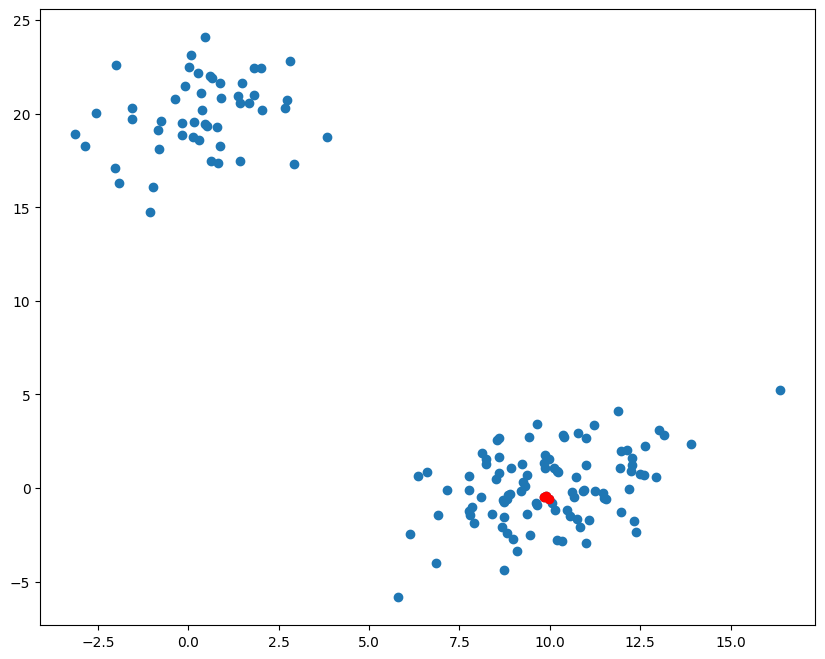

In [16]:
idxs = [33, 68, 62]

plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1]) # plot all points
plt.scatter(X[idxs,0], X[idxs, 1], c='r') #plot the interesting points in red again
plt.show()

So, we can see that the 3 red dots are pretty close to each other, which is a good thing. 

- Looking at iteration 15 => we see index 41 => being merged with index 158 (translates to Z[8] => X[15], X[69])

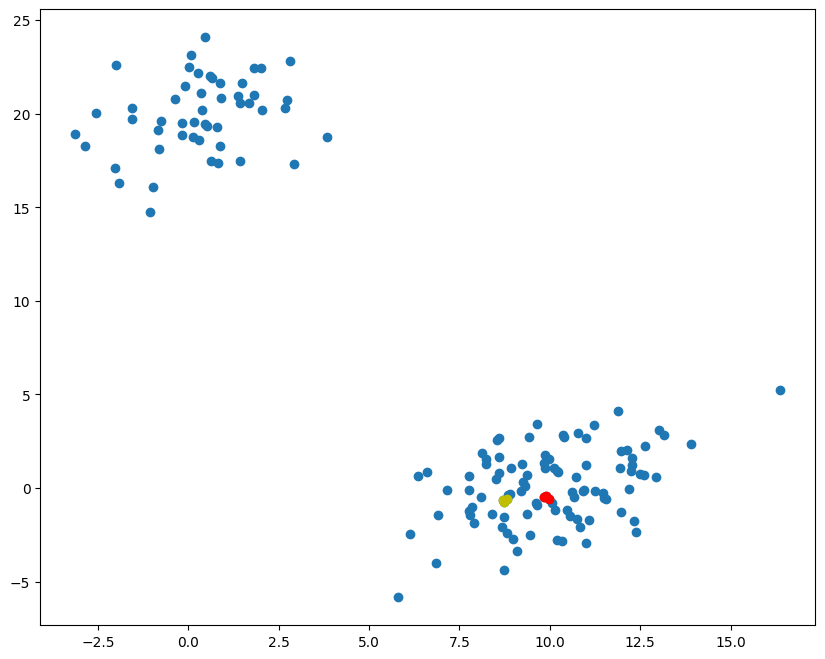

In [17]:
idxs = [33, 68, 62]
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1])
plt.scatter(X[idxs,0],X[idxs,1],c='r')
idxs=[15,69,41]
plt.scatter(X[idxs,0],X[idxs,1],c='y')
plt.show()

Plotting a dendrogram:
- A dendrogram is a visualization in form of a tree showing the order and distances of merges during the hierarchical clustering:

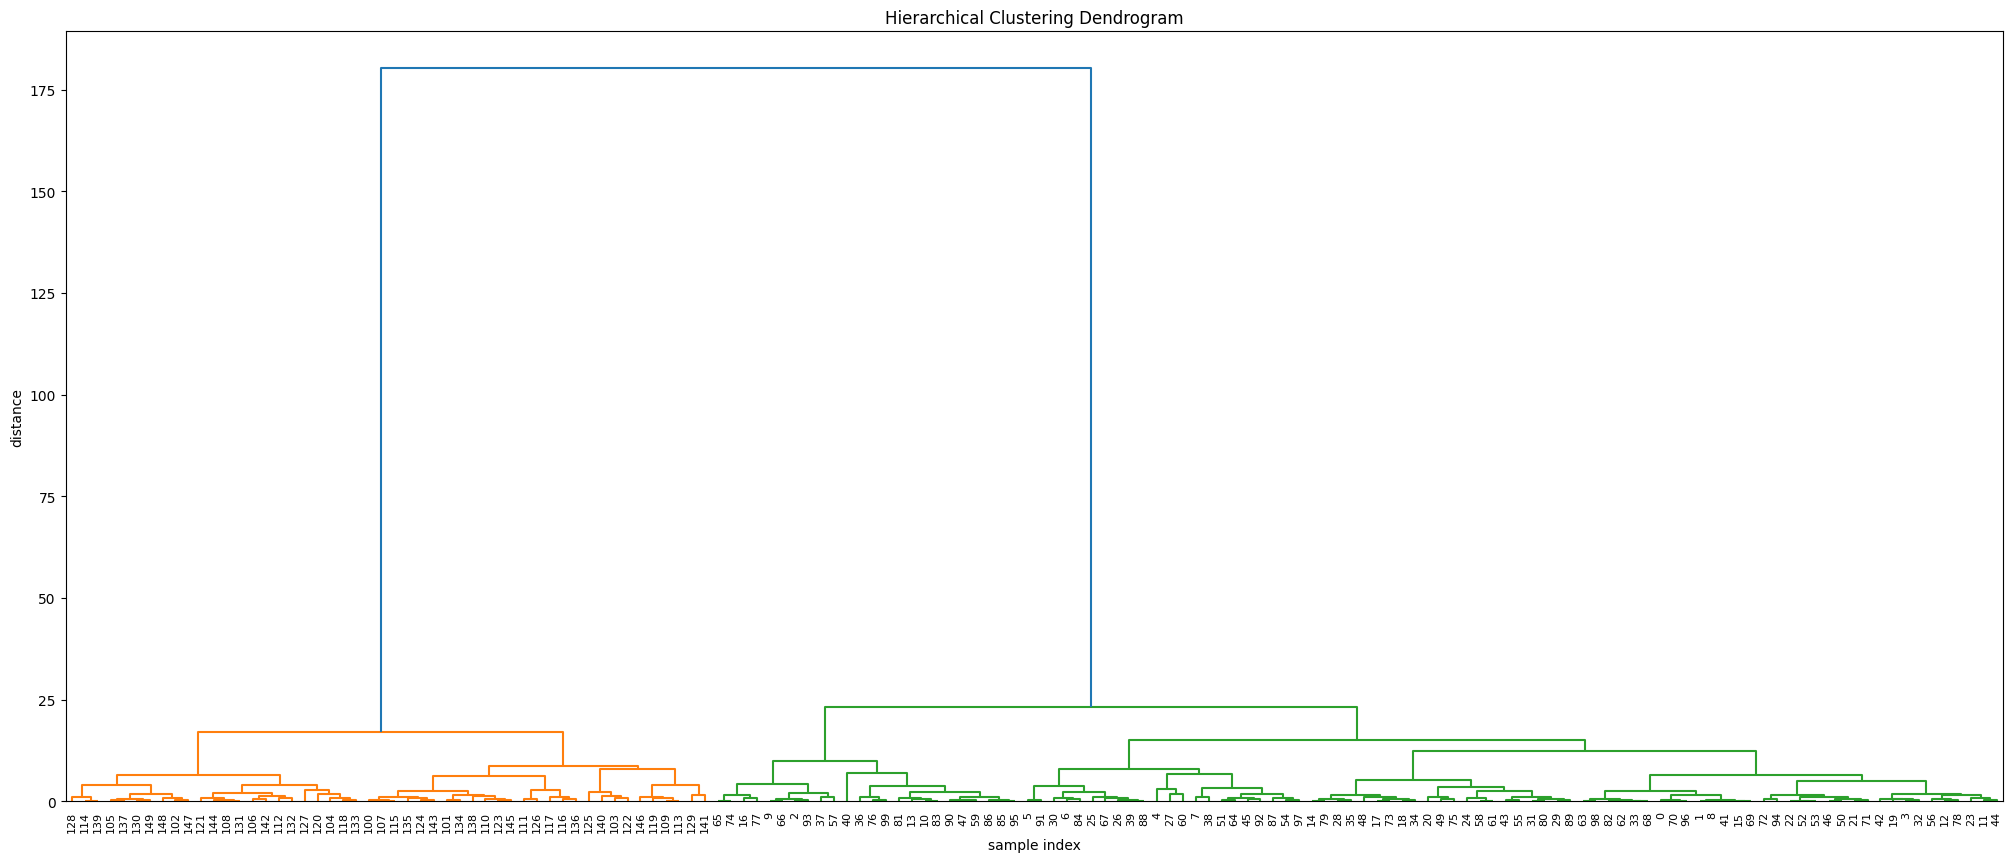

In [18]:
# calculate full dendrogram
plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')

dendrogram(
    Z,
    leaf_rotation=90., # rotates the x axis labels
    leaf_font_size=8., # font size for the x axis labels
)

plt.show()

- On the x axis - labels. These are the indices of the samples in the original X matrix
- On the y-axis - distances of the ward method in our case.
- Heights of the horizontal lines tell you about the distance that needed to be bridged to form the new cluster.
- You can see that from distances > 25 up, there's a huge jump of the distances to the final merge at a distance of approx 180. Let's have a look at the distances of the last 4 merges:

In [19]:
Z[-4:,2]

array([ 15.11533118,  17.11527362,  23.12198936, 180.27043021])

Such distance jumps/gaps in the dendrogram are interesting as they indicate that something is merged that maybe just shouldn't be merged. In other words: maybe the things that were merged just don't belong to the same cluster, telling us that maybe there's 2 clusters here. 
- wondering how the dendrogram is coloured - the color_threshold argument: for brevity, let t be the color_threshold, colors all the descendent links below a cluster node k the the same color if k is the first node below the cut threshold t. All links connecting nodes with distances greater than or equal the threshold are colored with the default matplotlib color of 'C0'. By default - color threshold automatically picked a distance cut-off threshold value of 70% of the final merge and then colored the first clusters below that in individual colors

In [20]:
Z[-1, 2] * 0.7

126.18930114733328

That was its pick

**Dendrogram Truncation:**
- As you may have noticed - the above is pretty big for 150 samples already the above is pretty big for 150 samples. 

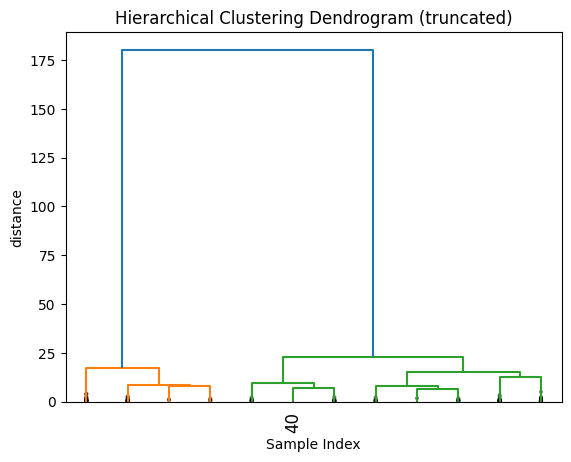

In [21]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample Index')
plt.ylabel('distance')

dendrogram(
    Z,
    truncate_mode='lastp', # show only the last p merged clusters
    p = 12, #show only the last p merged clusters
    show_leaf_counts=False, #otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True, # to get a distribution impression in truncated branches
)

plt.show()

The above shows a truncated dendrogram, which only shows the last p=12 out of 149 merges.
- first thing you ought to notice is that the labels are missing. That's because except for X[40], all other samples were already merged to clusters before the last 12 merges. 
- The parameter show contracted allows us to draw black dots at the heights of the previous cluster merges 
- As its hard to keep track of the cluster sizes just by dots - dendrogram will by default also print the cluster sizes in brackets (), if a cluster was truncated.

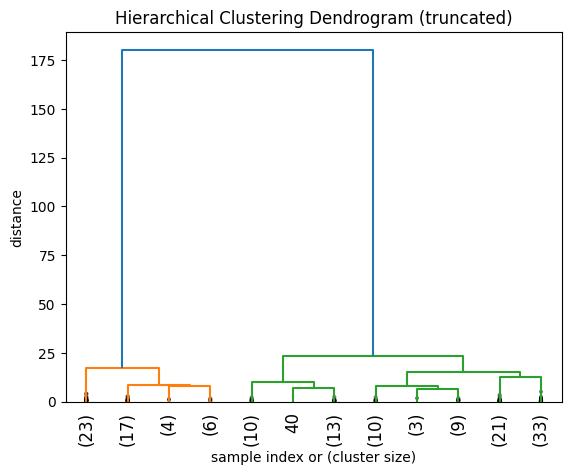

In [22]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

dendrogram(
    Z,
    truncate_mode='lastp', #show only the last merged clusters
    p=12, # show only the last p merged clusters
    leaf_rotation = 90.,
    leaf_font_size=12.,
    show_contracted=True, # to get a distribution impression in truncated branches
)

plt.show()

**Eye Candy:**
- Even though this already makes for quite a nice visualization, we can pimp it even more by also annotating the distances inside the dendrogram by using sosome of the useful return values dendrogram():

In [23]:
z = {'name': 'Blaise','age':27}

In [24]:
z.pop('name',None)

'Blaise'

In [25]:
z

{'age': 27}

In [26]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

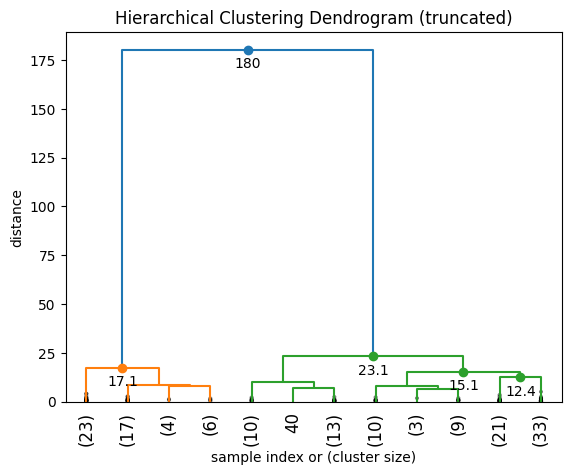

In [27]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10
)
plt.show()

**Selecting a Distance cut-off aka determining the number of clusters:**
- As explained above already, a huge jump in distance is typically what we're interested in if we want to argue for a certain number of clusters. If you have the chance to do this manually - opt for that always as it allows you to gain some insights into your data and to perform some sanity checks on the edge cases. In this case - cut off is probably 50 as the jump is pretty obvious. 

In [28]:
# set cut-off to 50

max_d = 50 # max-d as in max_distance

Let's visualize the dendrogram as a cut-off line:

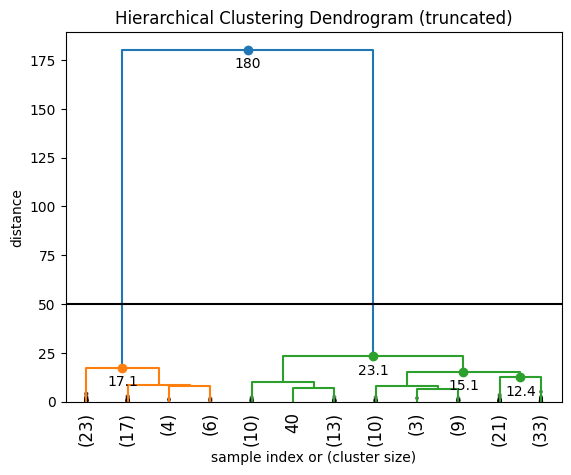

In [29]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d = max_d,
)
plt.show()

as we can see, we've got 2 clusters at this cut-off.
- In general for a chosen cut-off value max_d, you can always simply count the number of intersections with vertical lines of the dendrogram to get the number of formed clusters. Say, we choose a cut-off of max_d=16, we get 4 final clusters:

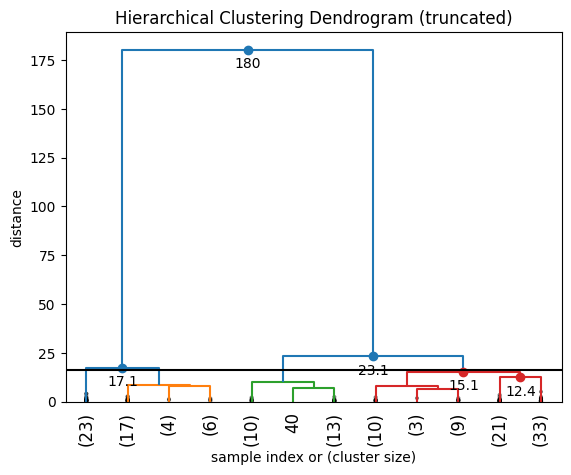

In [30]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=16
)
plt.show()

**Automated cut-off selection (or why you shouldn't rely on this)**
- now while this manual selection of a cut-off value offers a lot of benefits when it comes to checking for a meaningful clustering and cut-off, there are cases in which you want to automate this.
- the problem again is that there is no golden method to pick the number of clusters for all cases (which is why is i also think the investigative and backtesting manual method is preferable). 

  - **Some common clustering methods:**
      - **Inconsistency Method:**
          - For example, lets have a look at the inconsistency method - which seems to be one of the defaults for the fcluster() function in scipy
          - The question driving the inconsistency method is what makes a distance jump a jump. It answers this by comparing each cluster merge's height h to the average avg and normalizing it by the standard deviation std formed over the depth previous levels
          - The following shows a matrix of the avg, std, count, inconsistency for each of the last 10 merges of our hierarchical clustering with a depth of 5

In [31]:
from scipy.cluster.hierarchy import inconsistent

In [32]:
depth = 5
incons = inconsistent(Z, depth)
incons[-10:]

array([[ 1.80874989,  2.17061644, 10.        ,  2.44276733],
       [ 2.31731998,  2.19649179, 16.        ,  2.52742372],
       [ 2.24511599,  2.44225327,  9.        ,  2.37659088],
       [ 2.30462321,  2.44191287, 21.        ,  2.6387508 ],
       [ 2.20673283,  2.68378067, 17.        ,  2.84581581],
       [ 1.95309037,  2.58100378, 29.        ,  4.05821033],
       [ 3.46173275,  3.53735716, 28.        ,  3.29443647],
       [ 3.15857131,  3.54836284, 28.        ,  3.93327935],
       [ 4.90210137,  5.10301603, 28.        ,  3.57041559],
       [12.12200256, 32.15467931, 30.        ,  5.22936105]])

In [33]:
incons.shape

(149, 4)

In [34]:
incons

array([[4.15105485e-02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.91375926e-02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.10677929e-02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.13712071e-02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.54313099e-02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.09277896e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.10071548e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.13022407e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.14289714e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.21200766e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.21671017e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.24900190e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.40277358e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.21833664e-01, 7.17937830e-02, 2.00000000e

from the above - you might be tempted ti pick 5 as the limit in yhe inconsistencies. , but look at what happens when we set the depth to 3 instead:

In [35]:
depth = 3
incons = inconsistent(Z, depth)
incons[-10:]

array([[ 3.63777835,  2.5556114 ,  4.        ,  1.35908084],
       [ 3.89767268,  2.57216151,  7.        ,  1.54388156],
       [ 3.05885714,  2.66707272,  6.        ,  1.87115096],
       [ 4.92746418,  2.73259589,  7.        ,  1.39821573],
       [ 4.76943311,  3.16276553,  6.        ,  1.60455941],
       [ 5.27287862,  3.56604844,  7.        ,  2.00627335],
       [ 8.22057081,  4.07583053,  7.        ,  1.69162096],
       [ 7.83287032,  4.46681266,  7.        ,  2.07808207],
       [11.38091435,  6.29430022,  7.        ,  1.86535033],
       [37.25844589, 63.31539362,  7.        ,  2.25872377]])

Inconsistency values heavily depend on the depth of the tree you calculate averages over. 

**Elbow Method:**
- Another thing: Variant of the elbow method: 
- Tries to find the clustering step where the acceleration of distance growth is the biggest (the strongest elbow) of the blue line graph below, which is the highest value of the green graph below:

In [37]:
last = Z[-10:, 2]

In [38]:
last

array([  7.11106083,   7.86878542,   8.04935282,   8.74822275,
         9.84427829,  12.42734657,  15.11533118,  17.11527362,
        23.12198936, 180.27043021])

In [39]:
last[::-1]

array([180.27043021,  23.12198936,  17.11527362,  15.11533118,
        12.42734657,   9.84427829,   8.74822275,   8.04935282,
         7.86878542,   7.11106083])

In [40]:
last_rev = last[::-1]

In [41]:
idxs = np.arange(1, len(last)+1)

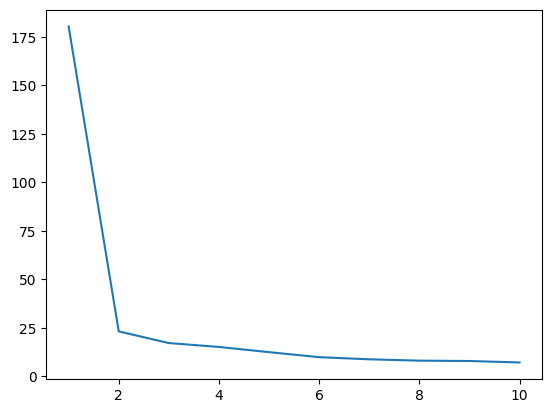

In [43]:
plt.plot(idxs, last_rev)

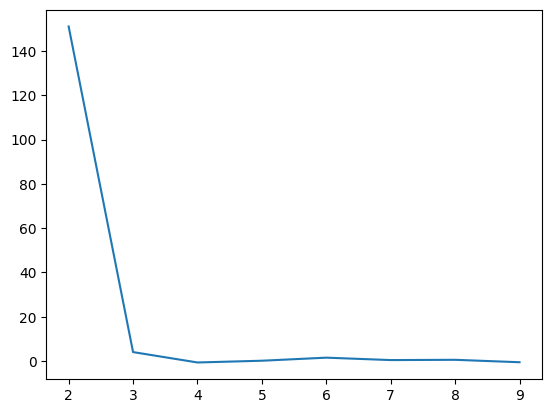

In [ ]:
acceleration = np.diff(last,2)
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2]+1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2

**Retrieve the clusters:**
- 

How to retrieve clusters, for different ways of determining k, we can use the fcluster function:

**Knowing max_d:**
- Let's say we determined the max_distance with the help of a dendrogram, then we can do the following to get the cluster id for each of our samples:

In [46]:
from scipy.cluster.hierarchy import fcluster

max_d = 50

clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

**Knowing k:**
- Another way starting from the dendrogram is to say - i can see i have k=2 clusters: you can then use:

In [47]:
k = 2
fcluster(Z, k, criterion='maxclust')

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

**Using the inconsistency Method default**
- if you're really sure you want to use the inconsistency method to determine the number of clusters in your dataset - you can use the default criterion of fcluster

In [48]:
from scipy.cluster.hierarchy import fcluster
fcluster(Z,8,depth=10)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

**Visualising Your clusters:**

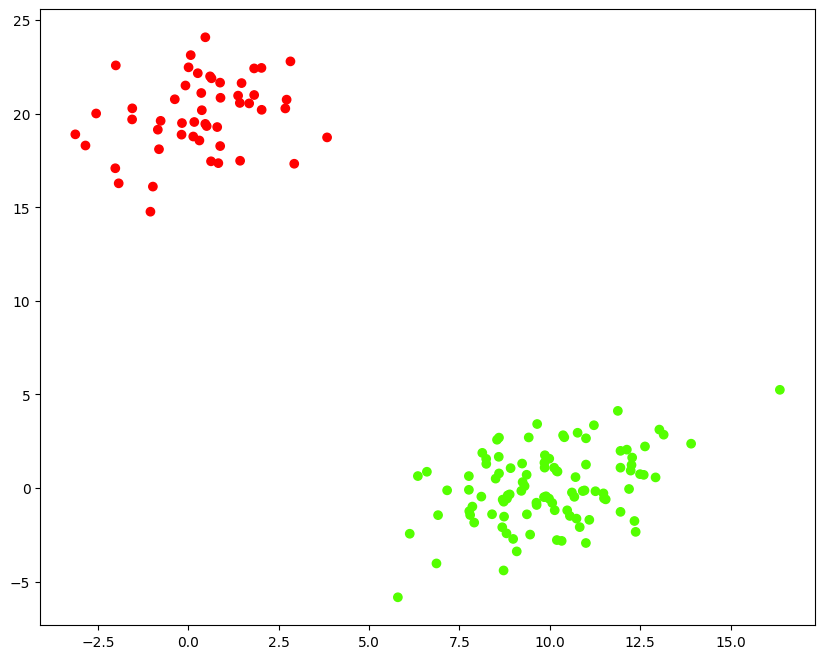

In [49]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1], c=clusters,cmap='prism')
plt.show()

!(Source)[https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/]

![https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/]